In [1]:
import pickle5
val_X, val_Y = pickle5.load(open("./data/val_annot.pkl", 'rb'))

In [2]:
from utils.model import FAN
from utils.tool import load_parameters
model = FAN(num_HG=1)
load_parameters(model, './save/0.pt')

Loading model parameters from ./save/0.pt...
End of loading !!!


In [76]:
from utils.dataset import process_annot, FaceSynthetics, get_transform, convert_label
from utils.tool import pred_to_keypoints, plot_keypoint
import pickle5
import torch
annot_path = "./data/val_annot.pkl"
# images, labels = process_annot(annot_path)
images , labels = pickle5.load(open(annot_path, 'rb'))
valid_imgs = []
valid_labels = []
gd_labels = []
for img, label in zip(images, labels):
    result = convert_label(label)
    if result[0]:
        valid_imgs.append(img)
        valid_labels.append(result[1])
        gd_labels.append(label)


dataset = FaceSynthetics("./data/val", valid_imgs, valid_labels, get_transform("test"))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

with torch.no_grad():
    for gd_label, (img, label) in zip(gd_labels, dataset):
        img = img.to(device).unsqueeze(dim=0)
        label = label.to(device)
        outputs = model(img)
        pred = pred_to_keypoints(outputs)
        break

In [77]:
im = plot_keypoint(os.path.join('./data/val', valid_imgs[0]), gd_labels[0], pred[0].tolist())

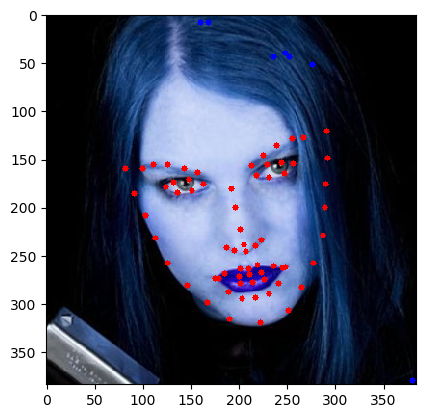

In [78]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [36]:

import torch

def heatmap_to_keypoints(heatmap):
    lmx = torch.argmax(torch.max(heatmap, dim=2)[0], dim=2) * 4
    lmy = torch.argmax(torch.max(heatmap, dim=3)[0], dim=2) * 4

    landmark = torch.stack((lmx, lmy), dim=2)
    return landmark


bs = 20
num_class = 10
size = 3
heatmap = torch.rand((1, num_class, size, size))

heatmap_to_keypoints(heatmap).shape

torch.Size([1, 10, 2])

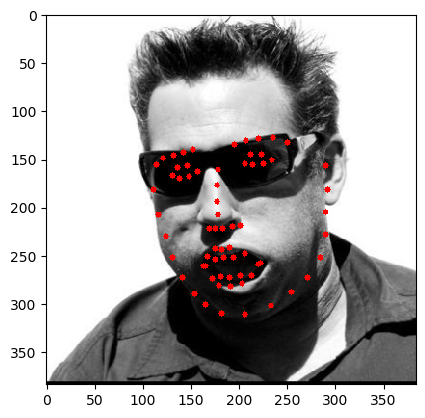

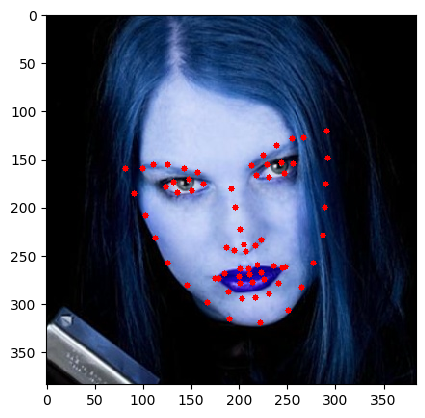

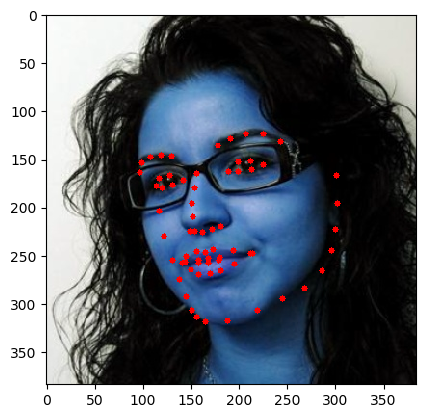

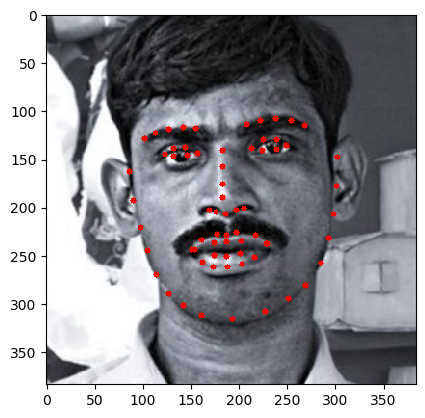

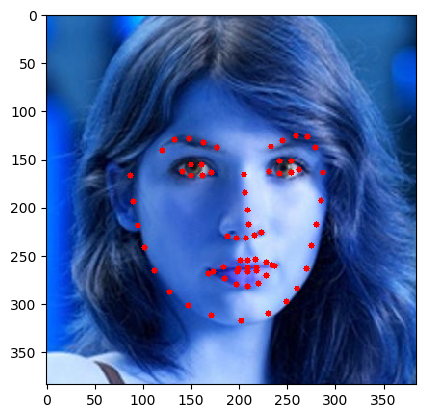

In [19]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import torch
root_dir = "./data/val"

def heatmap_to_keypoints(heatmap):
    lmx = torch.argmax(torch.max(heatmap, dim=2)[0], dim=2) * 4
    lmy = torch.argmax(torch.max(heatmap, dim=3)[0], dim=2) * 4

    landmark = torch.stack((lmx, lmy), dim=2)
    return landmark

def plot_keypoint(img_path, gd:list, label:list):
    im = cv2.imread(os.path.join(root_dir, img_path))
    for (x, y) in gd:
        cv2.circle(im, (x,y), radius=3, color=(255, 0, 0),thickness=-1)
    for (x, y) in label:
        cv2.circle(im, (x,y), radius=3, color=(0, 0, 255),thickness=-1)
    return im

for idx in range(5):
    img_path = val_X[idx]
    label = val_Y[idx]
    im = cv2.imread(os.path.join(root_dir, img_path))

    plt.figure()
    plt.imshow(im)
plt.show()

In [8]:
cv2.imshow('test', im)

# 按下任意鍵則關閉所有視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

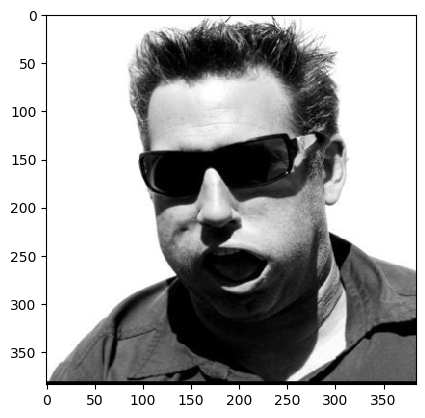